<a href="https://colab.research.google.com/github/KarenLira25/Proyecto-Redes-Neuronales/blob/main/Proyecto_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Silvia Karen Retama Lira

##1. Entrena una red neuronal para que reproduzca la siguientes funciones
 en el intervalo de [-1,1]. Graficar la solución de la red en conjunto con la
gráfica de la función.
*   $3 sin(πx)$
*   $1 + 2x + 4x^3$


In [196]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import asarray
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

### $3 sin(πx)$

In [197]:
# Conjunto de datos
x = np.arange(-1, 1, 0.001)
y = asarray([3*np.sin(math.pi*i) for i in x])     #convertir la estructura de los datos en un array Numpy
print(x.min(), x.max(), y.min(), y.max())

#transformar los arreglos
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

#escalar las variables de entrada y las variables de salida
esc_x = MinMaxScaler()
x = esc_x.fit_transform(x)
esc_y = MinMaxScaler() 
y = esc_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

-1.0 0.9990000000000019 -3.0 3.0
0.0 0.9999999999999999 0.0 1.0


Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 0.0902
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0388
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0294
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0206
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0149
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 8/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 9/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 10/50
100/100 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 11/50
100/100 [==============================] - 0s 5ms/step - loss: 0.0052
Epoch 12/50
100/100 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 13/50
100/100 [====

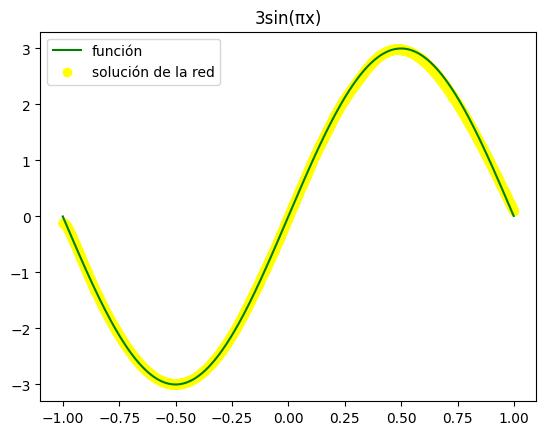

In [198]:
#diseño del modelo de la red neuronal
modelo = Sequential()
modelo.add(Dense(512, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
modelo.add(Dense(512, activation='sigmoid', kernel_initializer='he_uniform'))
modelo.add(Dense(1))


modelo.compile(loss= 'mse', optimizer='adam')               #función de pérdida y algoritmo de optimización
modelo.fit(x, y, epochs=50, batch_size=20, verbose=1)       #modelo con los datos de entrenamiento
y1 = modelo.predict(x)                                      #predicciones para los datos de entrada

# transformadas inversas
x_0 = esc_x.inverse_transform(x)
y_0 = esc_y.inverse_transform(y)
y1_0 = esc_y.inverse_transform(y1)

#gráfica
plt.plot(x_0, y_0, color='green', label='función')
plt.scatter(x_0, y1_0, color='yellow', label='solución de la red')
plt.title('3sin(πx)')
plt.legend()
plt.show()

### $1+2x+4x^3$

In [205]:
# Conjunto de datos
x = np.arange(-1, 1, 0.001)
y = asarray([1+2*i+4*i**3 for i in x])     #convertir la estructura de los datos en un array Numpy
print(x.min(), x.max(), y.min(), y.max())

#transformar los arreglos
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

#escalar las variables de entrada y las variables de salida
esc_x = MinMaxScaler()
x = esc_x.fit_transform(x)
esc_y = MinMaxScaler() 
y = esc_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

-1.0 0.9990000000000019 -5.0 6.986011996000027
0.0 0.9999999999999999 0.0 1.0


Epoch 1/28
100/100 [==============================] - 1s 3ms/step - loss: 0.1036
Epoch 2/28
100/100 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 3/28
100/100 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 4/28
100/100 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 5/28
100/100 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 6/28
100/100 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 7/28
100/100 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 8/28
100/100 [==============================] - 0s 3ms/step - loss: 6.0587e-04
Epoch 9/28
100/100 [==============================] - 0s 3ms/step - loss: 5.1149e-04
Epoch 10/28
100/100 [==============================] - 0s 3ms/step - loss: 5.5414e-04
Epoch 11/28
100/100 [==============================] - 0s 3ms/step - loss: 5.2239e-04
Epoch 12/28
100/100 [==============================] - 0s 3ms/step - loss: 4.4919e-04
Epoch

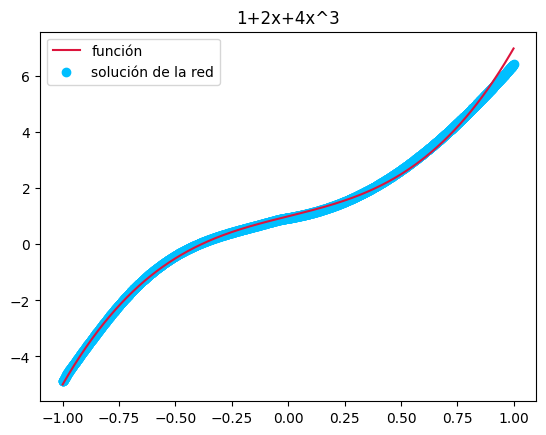

In [242]:
#diseño del modelo de la red neuronal
modelo = Sequential()
modelo.add(Dense(512, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
modelo.add(Dense(512, activation='sigmoid', kernel_initializer='he_uniform'))
modelo.add(Dense(1))


modelo.compile(loss= 'mse', optimizer='adam')               #función de pérdida y algoritmo de optimización
modelo.fit(x, y, epochs=28, batch_size=20, verbose=1)       #modelo con los datos de entrenamiento
y1 = modelo.predict(x)                                      #predicciones para los datos de entrada

# transformadas inversas
x_0 = esc_x.inverse_transform(x)
y_0 = esc_y.inverse_transform(y)
y1_0 = esc_y.inverse_transform(y1)

#gráfica
plt.plot(x_0, y_0, color='crimson', label='función')
plt.scatter(x_0, y1_0, color='deepskyblue', label='solución de la red')
plt.title('1+2x+4x^3')
plt.legend()
plt.show()

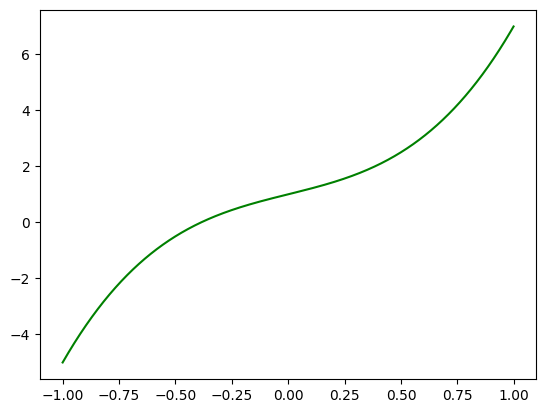

In [204]:
x = np.arange(-1, 1, 0.001)
y =  1+2*x+4*x**3
plt.plot(x, y, color='green')
plt.show()

##2. Elegir un problema de los siguientes

*  Detectar fraudes en movimientos de tarjetas bancarias: https://www.kaggle.com/mlg-ulb/creditcardfraud
*  Identificar enfermedades en plantas: https://www.kaggle.com/competitionsplant-pathology-2021-fgvc8/data
y diseñnar y entrenar una red neuronal con keras.